In [1]:
import synapseclient
import pandas as pd
import json
import csv

In [2]:
def TapPerformance(TapPD1):
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonLeft', 'TappedButtonId'] = 0
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonRight', 'TappedButtonId'] = 1
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonNone', 'TappedButtonId'] = 2
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonLeft'] = 0
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonRight'] = 1
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonNone'] = 2
    TapPD1 = Artifactfixed(TapPD1)
    TapPerf= TapPD1.shape[0]
    return (TapPerf)

In [3]:
#def ConvertTypePatient(MedTime):
#    if (MedTime == "I don't take Parkinson medications"):
#        ClassPD = 0
#    elif (MedTime == "Immediately before Parkinson medication"):
#        ClassPD = 1
#    elif (MedTime == "Just after Parkinson medication (at your best)"):
#        ClassPD =2
#    else (MedTime == "Another time"):
#        ClassPD =3

In [4]:
#Index=list()
def Artifactfixed(TapCont):
    Ind =  [True] * TapCont.shape[0]
    for item in range(0,TapCont.shape[0]-1):
        if TapCont.TapCoordinate[item]==TapCont.TapCoordinate[item+1]:
            if TapCont.TappedButtonId[item]==2:
                Ind[item]=False
            elif TapCont.TappedButtonId[item+1]==2:
                Ind[item]=False
    TapContArtFixed=TapCont[Ind]
    return TapContArtFixed
          

In [5]:

syn = synapseclient.Synapse()
syn.login('catarivera8', 'Crm1061709701')


## QUERY THE mPower PROJECT (syn4993293) FOR ALL OF THE TABLES
# See examples: https://python-docs.synapse.org/build/html/index.html 
# and https://www.synapse.org/#!Synapse:syn4993293/discussion/threadId=6785
with open('TappingTable.csv') as csvfile:
    TapTable=pd.read_csv(csvfile, delimiter=',')
with open('DemoTable.csv') as csvfile:
    DemoTable=pd.read_csv(csvfile, delimiter=',') 
#Using Patient column (healthCode) as index for the Data frames
#TapTableB = TapTable.set_index("healthCode", drop = False) 
#DemoTableB = DemoTable.set_index("healthCode", drop = False)    

      
#TapPD = list()
PathList = list()
LabelList = list()
#PatientType = list()
#PatientList = list()
#AgeList = list()
Perform =list()
for offset in range(0,800,100):
    results = syn.tableQuery('SELECT * FROM syn5511439 LIMIT 100 OFFSET '+str(offset))
    file_map=syn.downloadTableColumns(results,['tapping_results.json.TappingSamples'])
    for file_handle_id, path in file_map.items():
        #TapPD.append(pd.read_json(path))
        PathList.append(path)
        LabelList.append(int(file_handle_id))
        #PatientType.append(TapTableB['medTimepoint'][TapTable['tapping_results.json.TappingSamples'] == int(file_handle_id)])
        Perform.append(TapPerformance(pd.read_json(path))) #Tap performance
        #PatientList.append(TapTableB['healthCode'][TapTableB['tapping_results.json.TappingSamples'] == int(file_handle_id)])
        #DemoTableB.loc[(TapTableB['healthCode'][TapTableB['tapping_results.json.TappingSamples'] == int(file_handle_id)]),"age"]
        

Welcome, Catalina Rivera!



## Building data frame using tapping performance and demographic information

In [6]:
#Creating directory
d = {'tapping_results.json.TappingSamples':LabelList,'TapPerform':Perform}
PerfInfo = pd.DataFrame(d)
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
#TapTable=TapTable.merge(PerfInfo,left_on='tapping_results.json.TappingSamples', right_on='tapping_results.json.TappingSamples')
TapTable=TapTable.merge(PerfInfo)
#Sub-DataFrame of Demo Table with only features of interest: Age, diagnostic year, gender.
DemoTable.head()
DemoTableN=DemoTable[["age","healthCode","diagnosis-year","gender"]]
DemoTableN.shape
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
TapTableN=TapTable.merge(DemoTableN)
TapTableN['diagnosis-year'] = TapTableN['diagnosis-year'].fillna(0)
TapTableN

,ROW_ID,ROW_VERSION,recordId,healthCode,createdOn,appVersion,phoneInfo,accel_tapping.json.items,tapping_results.json.ButtonRectLeft,tapping_results.json.ButtonRectRight,tapping_results.json.endDate,tapping_results.json.startDate,tapping_results.json.TappingSamples,tapping_results.json.TappingViewSize,medTimepoint,TapPerform,age,diagnosis-year,gender
0,82315,18,caf7a74b-0d2e-4c43-9233-ed5dc6e7b176,639e8a78-3631-4231-bda1-c911c1b169e5,1.425900e+12,"version 1.0, build 7",iPhone 6,5395782.0,"{{0, 191.5}, {104, 104}}","{{128, 191.5}, {104, 104}}",1.425900e+12,1.425900e+12,5395798.0,"{375, 603}",I don't take Parkinson medications,294,24.0,0.0,Male
1,82316,18,94c95572-b405-49ca-9eb0-7426254990d5,52fe366a-2a9f-4260-9fb1-0fbc637a6cf4,1.425930e+12,"version 1.0, build 7",iPhone 5s (GSM),5403976.0,"{{0, 156.5}, {104, 104}}","{{128, 156.5}, {104, 104}}",1.425930e+12,1.425930e+12,5403991.0,"{320, 504}",I don't take Parkinson medications,289,38.0,0.0,Female
2,82317,18,ebd99144-5b84-486e-818c-5f8daf8beebf,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5397281.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",1.425930e+12,1.425930e+12,5397298.0,"{414, 672}",I don't take Parkinson medications,164,32.0,0.0,Male
3,82318,18,8e32cff2-c8f9-4047-af57-411a98fc9116,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5395191.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",1.425930e+12,1.425930e+12,5395211.0,"{414, 672}",I don't take Parkinson medications,229,32.0,0.0,Male
4,82322,18,a706aa9b-691c-4b92-9eec-b85f25771eee,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5395372.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",1.425930e+12,1.425930e+12,5395388.0,"{414, 672}",I don't take Parkinson medications,176,32.0,0.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,83107,18,6bbb1e1b-2948-45a3-8e86-9e592c8b73d7,a841cbb1-4ba2-4c9c-9bd0-1866116ca054,1.425940e+12,"version 1.0, build 7",iPhone 6 Plus,5391591.0,"{{0, 184.33333333333331}, {104, 104}}","{{128, 184.33333333333331}, {104, 104}}",1.425940e+12,1.425940e+12,5391607.0,"{414, 672}",Another time,194,32.0,0.0,Male
651,83112,18,3a588ff4-b724-4e25-a930-592ce9151840,a841cbb1-4ba2-4c9c-9bd0-1866116ca054,1.425940e+12,"version 1.0, build 7",iPhone 6 Plus,5399966.0,"{{0, 184.33333333333331}, {104, 104}}","{{128, 184.33333333333331}, {104, 104}}",1.425940e+12,1.425940e+12,5399982.0,"{414, 672}",Another time,265,32.0,0.0,Male
652,83109,18,ad10bd61-fce6-4d86-8071-8ba0694a20ec,2ad43bf5-6f74-479d-8635-4c1c495b09d6,1.425940e+12,"version 1.0, build 7",iPhone 5s (GSM),5400770.0,"{{0, 156.5}, {104, 104}}","{{128, 156.5}, {104, 104}}",1.425940e+12,1.425940e+12,5400782.0,"{320, 504}",I don't take Parkinson medications,264,38.0,0.0,Male
653,83110,18,0540728a-9dc3-4e67-b787-7bc45684f0b9,2ad43bf5-6f74-479d-8635-4c1c495b09d6,1.425940e+12,"version 1.0, build 7",iPhone 5s (GSM),5403973.0,"{{0, 156.5}, {104, 104}}","{{128, 156.5}, {104, 104}}",1.425940e+12,1.425940e+12,5403989.0,"{320, 504}",I don't take Parkinson medications,241,38.0,0.0,Male


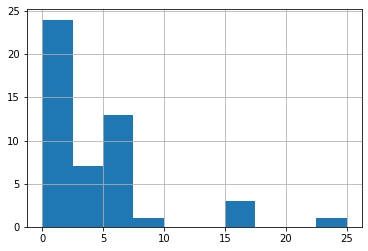

In [7]:
#Let us look at a histogram of the diagnosis year

Bol=TapTableN["diagnosis-year"]!=0 
Diagnosis=TapTableN["diagnosis-year"][Bol]
Bol2=Diagnosis>1960
Diagnosis= 2015-Diagnosis[Bol2]
#print(Diagnosis)
hist = Diagnosis.hist(bins=10)
YearsDiaQuant=Diagnosis.quantile([.25, .5, 0.75])


In [8]:
# change gender column to categorical 0:female, 1: male
df_gender = pd.get_dummies(TapTableN['gender'],drop_first=True)
#print(TapTableN.gender.value_counts())
TapTableN = pd.concat([TapTableN, df_gender], axis=1)
TapTableN.head()
#df.Embarked.value_counts()
#df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
#pd.get_dummies(df.Sex, drop_first=True)

,ROW_ID,ROW_VERSION,recordId,healthCode,createdOn,appVersion,phoneInfo,accel_tapping.json.items,tapping_results.json.ButtonRectLeft,tapping_results.json.ButtonRectRight,...,tapping_results.json.startDate,tapping_results.json.TappingSamples,tapping_results.json.TappingViewSize,medTimepoint,TapPerform,age,diagnosis-year,gender,Male,Prefer not to answer
0,82315,18,caf7a74b-0d2e-4c43-9233-ed5dc6e7b176,639e8a78-3631-4231-bda1-c911c1b169e5,1.425900e+12,"version 1.0, build 7",iPhone 6,5395782.0,"{{0, 191.5}, {104, 104}}","{{128, 191.5}, {104, 104}}",...,1.425900e+12,5395798.0,"{375, 603}",I don't take Parkinson medications,294,24.0,0.0,Male,1,0
1,82316,18,94c95572-b405-49ca-9eb0-7426254990d5,52fe366a-2a9f-4260-9fb1-0fbc637a6cf4,1.425930e+12,"version 1.0, build 7",iPhone 5s (GSM),5403976.0,"{{0, 156.5}, {104, 104}}","{{128, 156.5}, {104, 104}}",...,1.425930e+12,5403991.0,"{320, 504}",I don't take Parkinson medications,289,38.0,0.0,Female,0,0
2,82317,18,ebd99144-5b84-486e-818c-5f8daf8beebf,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5397281.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",...,1.425930e+12,5397298.0,"{414, 672}",I don't take Parkinson medications,164,32.0,0.0,Male,1,0
3,82318,18,8e32cff2-c8f9-4047-af57-411a98fc9116,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5395191.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",...,1.425930e+12,5395211.0,"{414, 672}",I don't take Parkinson medications,229,32.0,0.0,Male,1,0
4,82322,18,a706aa9b-691c-4b92-9eec-b85f25771eee,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1.425930e+12,"version 1.0, build 7",iPhone 6 Plus,5395372.0,"{{0, 191.33333333333331}, {104, 104}}","{{128, 191.33333333333331}, {104, 104}}",...,1.425930e+12,5395388.0,"{414, 672}",I don't take Parkinson medications,176,32.0,0.0,Male,1,0


In [38]:
# Classification for each quantile
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = TapTableN[['TapPerform','age','Male','Prefer not to answer']].to_numpy()
#XTapPerf = np.reshape(XTapPerf, (-1,1))
Y = TapTableN['diagnosis-year'].to_numpy()
Y[Y!=0] = 1
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=0)
#print(X_train.shape)
#print(y_train.shape)

#Training logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))






Accuracy of logistic regression classifier on test set: 0.93
[[179   4]
 [  9   5]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       183
         1.0       0.56      0.36      0.43        14

    accuracy                           0.93       197
   macro avg       0.75      0.67      0.70       197
weighted avg       0.92      0.93      0.93       197



(49,)